## A CNN test on the classic digit recogniser problem

The beginning of a simple classification problem using scikit-learn

In [1]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt, matplotlib.image as mpimg

from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier

Lets load the data, but only part of it to save my wee old laptop from burning out.

In [2]:
labeled_images = pd.read_csv('train.csv')
images = labeled_images.iloc[1:100,1:]
labels = labeled_images.iloc[1:100,:1]
train_images, test_images,train_labels, test_labels = train_test_split(images, labels, train_size=0.8, test_size=0.2, random_state=0)

Look at an image, and notice that in this dataset the images are flattened already.

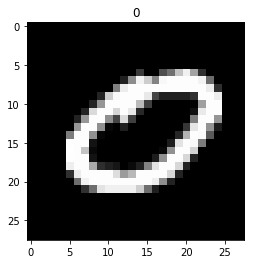

In [3]:
i=1
img=np.array(train_images.iloc[i])
img=img.reshape((28,28))
plt.imshow(img,cmap='gray')
plt.title(train_labels.iloc[i,0])
plt.show()

Feature scaling

In [4]:
Xtrain = np.array(train_images)
mean_px = Xtrain.mean()
std_px = Xtrain.std()
Xtrain = (Xtrain - mean_px)/std_px
Xtest = np.array(test_images)
mean_px = Xtest.mean()
std_px = Xtest.std()
Xtest = (Xtest - mean_px)/std_px

ytrain = train_labels
ytest = test_labels

Here is a MLP neural network from scikit-learn, using 4 layers of 128 neurons

In [7]:
clf = MLPClassifier(solver='lbfgs', alpha=1e-4, hidden_layer_sizes=(128, 4), random_state=1)
clf.fit(Xtrain,train_labels.values.ravel())
print(clf.score(Xtest,test_labels))

0.2
